In [1]:
!pip install pmdarima --upgrade
!pip install yfinance --upgrade
!pip install matplotlib --upgrade
!pip install statsmodels --upgrade
!pip install seaborn --upgrade

     ---------------------------------------- 7.2/7.2 MB 10.5 MB/s eta 0:00:00
     ------------------------------------- 930.9/930.9 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
     ---------------------------------------- 9.0/9.0 MB 16.0 MB/s eta 0:00:00

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.



     ---------------------------------------- 40.8/40.8 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.3
    Uninstalling packaging-20.3:
      Successfully uninstalled packaging-20.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.1
    Uninstalling statsmodels-0.11.1:
      Successfully uninstalled statsmodels-0.11.1
     -------------------------------------- 292.8/292.8 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [99]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import matplotlib as mpl
from matplotlib import style
import numpy as np

In [100]:
# period interval =  1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
period="1y"
# op interval 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
interval="1d"
# ticker TSLA, FB, BTC-USD, ETH-USD
lista_tickers=['TSLA', 'FB', 'BTC-USD', 'ETH-USD']
d = {}
for i in lista_tickers:
    ticker = i 
    #Definimos el dataframe
    T_prices = yf.download(tickers=ticker, period=period, interval=interval)
    #d[i] = T_prices['Adj Close'].to_frame()
    d[i] = T_prices
for name, df in d.items():
    #if name=='TSLA':
    #    df1 = df.copy()
    df1 = df.copy()
    print(df1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-07-02  678.979980  700.000000  673.260010  678.900024  678.900024   
2021-07-06  681.710022  684.000000  651.400024  659.580017  659.580017   
2021-07-07  664.270020  665.700012  638.320007  644.650024  644.650024   
2021-07-08  628.369995  654.429993  620.460022  652.809998  652.809998   
2021-07-09  653.179993  658.909973  644.690002  656.950012  656.950012   
...                ...         ...         ...         ...         ...   
2022-06-27  748.099976  756.210022  727.700012  734.760010  734.760010   
2022-06-28  733.450012  749.909973  697.030029  697.989990

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TSLA
FB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FB
FB


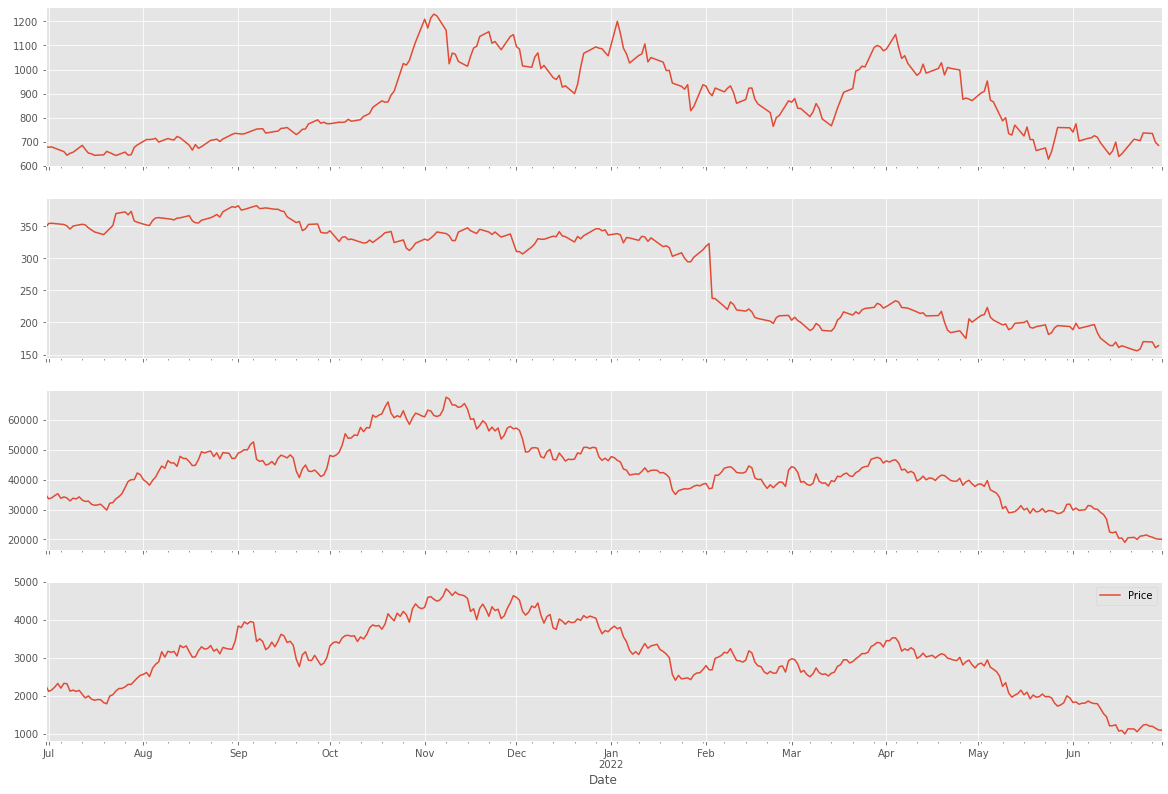

In [37]:
fig, ejes = plt.subplots(4, 1, figsize=(20, 15), sharex=True)
i=0
#for name, df in d.items():
for df, eje in zip(d.items(),ejes):
    df1 = df[1].copy()
    #df1=df1.loc['2022-05-01':'2022-05-31']
    close_px = df1['Adj Close']
    #mpl.rc('figure', figsize=(8, 7))
    #mpl.__version__
    style.use('ggplot')
    close_px.plot(label='Price',ax=eje)
    print(lista_tickers[i])
    i=+1
    plt.legend()

In [ ]:
for name, df in d.items():
    if name=='TSLA':
        df1 = df.copy()
        df1=df1.loc['2022-05-01':'2022-05-31']
        close_px = df1['Adj Close']
        style.use('ggplot')
        close_px.plot(label='Price')
        plt.legend()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for name, df in d.items():
    if name=='TSLA':
        df1 = df.copy()
        df1.reset_index(inplace=True)
        #df1["Datetime"] = pd.to_datetime(df1["Datetime"],format ='%Y%m%d')
        #df1["Datetime"] = df1["Datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
        df1["Datetime"] = df1["Date"].dt.strftime("%Y-%m-%d")
        df1=df1.set_index('Datetime')
        result = seasonal_decompose(df1['Adj Close'], model ='multiplicative',period=60)
        result.plot()
#df1

In [101]:
from pmdarima import auto_arima  
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

for name, df in d.items():
    if name=='TSLA':
        df1 = df.copy()
        df1.reset_index(inplace=True)
        df1["Date"] = pd.to_datetime(df1["Date"],format ='%Y%m%d')
        df1.loc[len(df1)] = [df1.loc[len(df1)-1][0] + pd.DateOffset(1),'','','','','','']
        df1=df1.set_index('Date')
        #df1["Datetime"] = pd.to_datetime(df1["Date"],format ='%Y%m%d %H:%M:%S')
        #df1["Datetime"] = df1["Datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
        #df1=df1.set_index('Datetime')
        
        #Se incluye indice con los ultimos 30 registros como variable exogena en el modelo
        '''
        Se asocian las variables del tiempo t ['Open','High','Low','Volume'] al precio ajustado de t-1 con el fin 
        de entrenar al modelo con las variables exogenas del día anterior
        ''' 
        df3=df1.copy()
        for i in range(0,len(df3)-1):
            df1['Open'][i+1] = df3['Open'][i]
            df1['High'][i+1] = df3['High'][i]
            df1['Low'][i+1] = df3['Low'][i]
            df1['Volume'][i+1] = df3['Volume'][i]
        df1=df1[df1.index>df1.index.min()]
        df1['Volume']=pd.to_numeric(df1['Volume'])
        df1['Volume']=np.log(df1['Volume'])
        
        warnings.filterwarnings("ignore")
        stepwise_fit = auto_arima(df1.iloc[:len(df1)-1]['Adj Close'], test='adf', 
                                  exogenous=df1.iloc[:len(df1)-1][['Open','High','Low','Volume']],
                                  start_p = 1, start_q = 1,
                                  max_p = 5, max_q = 5, m = 12,
                                  start_P = 0, seasonal = True,
                                  d = None, D = 1, trace = True,
                                  error_action ='ignore',  
                                  suppress_warnings = True, 
                                  stepwise = True)         

        stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2547.851, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2486.668, Time=2.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2545.851, Time=0.59 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2542.705, Time=1.56 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2467.414, Time=6.08 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.85 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2472.207, Time=3.53 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2467.901, Time=8.52 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2467.885, Time=7.90 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2465.292, Time=7.70 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2484.221, Time=2.69 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : 

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

#train, test = train_test_split(df1, test_size=0.2)
train = df1.iloc[:len(df1)-30]
test = df1.iloc[len(df1)-30:]

res=stepwise_fit.to_dict()

model = SARIMAX(train['Adj Close']
                , train[['Open','High','Low','Volume']]
                , order=res['order']
                , seasonal_order=res['seasonal_order']
                , trend = 'c'
               )  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Adj Close   No. Observations:                  222
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1074.720
Date:                             Mon, 04 Jul 2022   AIC                           2167.440
Time:                                     21:34:31   BIC                           2197.564
Sample:                                          0   HQIC                          2179.618
                                             - 222                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5815      4.151      0.381      0.703      -6.555       9.718
Open          -0.2304      0.185     -1.247      0.212      -0.592       0.132
High           0.3397      0.257      1.320      0.187      -0.165       0.844
Low            0.8373      0.224      3.733      0.000       0.398       1.277
Volume         6.9656     16.077      0.433      0.665     -24.544      38.476
ma.L1          0.3576      0.090      3.992      0.000       0.182       0.533
ar.S.L12      -0.5927      0.076     -7.751      0.000      -0.743      -0.443
ar.S.L24      -0.2952      0.080     -3.689      0.000      -0.452      -0.138
sigma2      1592.1473    132.581     12.009      0.000    1332.293    1852.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                34.95
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               4.31   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

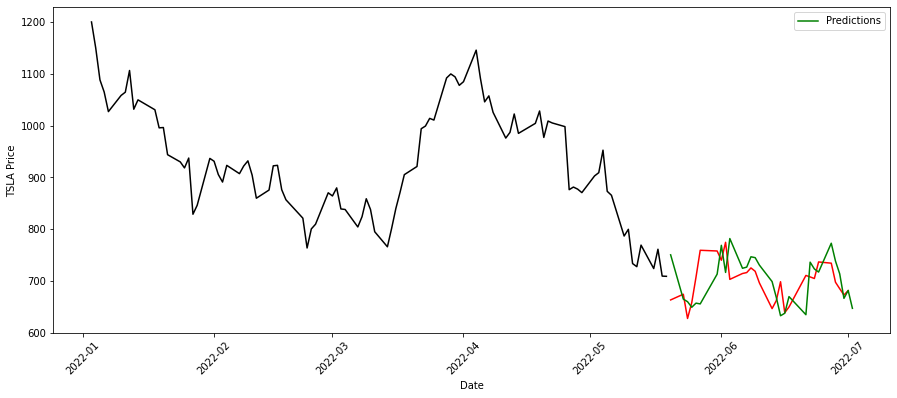

In [115]:
#model = SARIMAX(train['Adj Close'], order = res['order'])
#result = model.fit()
y_pred = result.get_forecast(len(test.index)
                             ,exog=test[['Open','High','Low','Volume']]
                            )
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = result.predict(start = y_pred_df.index[0]
                                          , end = y_pred_df.index[-1]
                                          ,exog=test[['Open','High','Low','Volume']]
                                         )
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
#y_pred_out.plot(legend = True)
#test['Adj Close'].plot(legend = True)
plt.figure(figsize=(15,6))
plt.plot(train[train.index>'2022-01-01']['Adj Close'], color = "black")
plt.plot(test['Adj Close'], color = "red")
plt.ylabel('TSLA Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
#figure(figsize=(8, 6), dpi=80)

In [104]:
df3_TSLA=pd.merge(y_pred_out, test, how='left', on='Date')
df3_TSLA=df3_TSLA[['Predictions','Adj Close']]
res_TSLA=(df3_TSLA.iloc[len(df3_TSLA)-1]['Predictions']-df3_TSLA.iloc[len(df3_TSLA)-2]['Adj Close'])/df3_TSLA.iloc[len(df3_TSLA)-2]['Adj Close']
res_TSLA1=(df3_TSLA.iloc[len(df3_TSLA)-1]['Predictions']-df3_TSLA.iloc[len(df3_TSLA)-2]['Predictions'])/df3_TSLA.iloc[len(df3_TSLA)-2]['Predictions']
print(df3_TSLA)

            Predictions   Adj Close
Date                               
2022-05-20   750.877330  663.900024
2022-05-23   665.484466  674.900024
2022-05-24   660.507431  628.159973
2022-05-25   649.758709  658.799988
2022-05-26   657.695761  707.729980
2022-05-27   656.235327  759.630005
2022-05-31   713.581123  758.260010
2022-06-01   769.149356  740.369995
2022-06-02   716.927113  775.000000
2022-06-03   782.240556  703.549988
2022-06-06   724.929080  714.840027
2022-06-07   727.176900  716.659973
2022-06-08   747.098547  725.599976
2022-06-09   745.402295  719.119995
2022-06-10   731.025664  696.690002
2022-06-13   699.296717  647.210022
2022-06-14   668.684093  662.669983
2022-06-15   633.420673  699.000000
2022-06-16   638.242258  639.299988
2022-06-17   670.365961  650.280029
2022-06-21   635.424553  711.109985
2022-06-22   736.707434  708.260010
2022-06-23   723.685261  705.210022
2022-06-24   717.633886  737.119995
2022-06-27   773.211432  734.760010
2022-06-28   738.723534  697

In [105]:
for name, df in d.items():
    if name=='BTC-USD':
        df2 = df.copy()
        df2.reset_index(inplace=True)
        df2["Date"] = pd.to_datetime(df2["Date"],format ='%Y%m%d')
        df2.loc[len(df2)] = [df2.loc[len(df2)-1][0] + pd.DateOffset(1),'','','','','','']
        df2=df2.set_index('Date')
        #df2["Datetime"] = pd.to_datetime(df2["Date"],format ='%Y%m%d %H:%M:%S')
        #df2["Datetime"] = df2["Datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
        #df2=df2.set_index('Datetime')
        
        #Se incluye indice con los ultimos 30 registros como variable exogena en el modelo
        '''
        Se asocian las variables del tiempo t ['Open','High','Low','Volume'] al precio ajustado de t-1 con el fin 
        de entrenar al modelo con las variables exogenas del día anterior
        ''' 
        df3=df2.copy()
        for i in range(0,len(df3)-1):
            df2['Open'][i+1] = df3['Open'][i]
            df2['High'][i+1] = df3['High'][i]
            df2['Low'][i+1] = df3['Low'][i]
            df2['Volume'][i+1] = df3['Volume'][i]
        df2=df2[df2.index>df2.index.min()]
        df2['Volume']=pd.to_numeric(df2['Volume'])
        df2['Volume']=np.log(df2['Volume'])
        
        warnings.filterwarnings("ignore")
        stepwise_fit1 = auto_arima(df2.iloc[:len(df2)-1]['Adj Close'], test='adf', 
                                  exogenous=df2.iloc[:len(df2)-1][['Open','High','Low','Volume']], #['Open','High','Low','Close','Volume']
                                  start_p = 1, start_q = 1,
                                  max_p = 5, max_q = 5, m = 12,
                                  start_P = 0, seasonal = True,
                                  d = None, D = 1, trace = True,
                                  error_action ='ignore',  
                                  suppress_warnings = True, 
                                  stepwise = True)         

        stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=6262.059, Time=7.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6442.465, Time=0.26 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6332.490, Time=6.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.76 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6440.556, Time=1.48 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=6391.929, Time=3.55 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=6302.359, Time=8.38 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=6302.278, Time=11.26 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=6302.651, Time=6.96 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=11.37 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=6310.688, Time=5.51 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=6295.198, Time=7.58 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=6302.921, Time=7.65 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=6322.934, Time=5.99 sec
 ARIMA(0,0,2)(0,1,1)[12] in

In [116]:
#train, test = train_test_split(df1, test_size=0.2)
train = df2.iloc[:len(df2)-30]
test = df2.iloc[len(df2)-30:]

res=stepwise_fit1.to_dict()

model = SARIMAX(train['Adj Close']
                , train[['Open','High','Low','Volume']]
                , order=res['order']
                , seasonal_order=res['seasonal_order']
                #, trend = 'c'
               )  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                  335
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -2846.295
Date:                            Mon, 04 Jul 2022   AIC                           5708.590
Time:                                    21:35:11   BIC                           5738.811
Sample:                                07-06-2021   HQIC                          5720.654
                                     - 06-05-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.5982      0.153      3.909      0.000       0.298       0.898
High           0.2504      0.110      2.281      0.023       0.035       0.466
Low            0.1195      0.080      1.491      0.136      -0.038       0.277
Volume        68.5835     86.648      0.792      0.429    -101.243     238.410
ar.L1          0.0006      0.080      0.008      0.994      -0.156       0.157
ma.L1          0.7955      0.095      8.383      0.000       0.610       0.982
ma.S.L12      -0.9965      0.077    -12.863      0.000      -1.148      -0.845
sigma2      2.593e+06      0.001   2.39e+09      0.000    2.59e+06    2.59e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                11.14
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.03
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.7e+26. Standard errors may be unstable.
"""

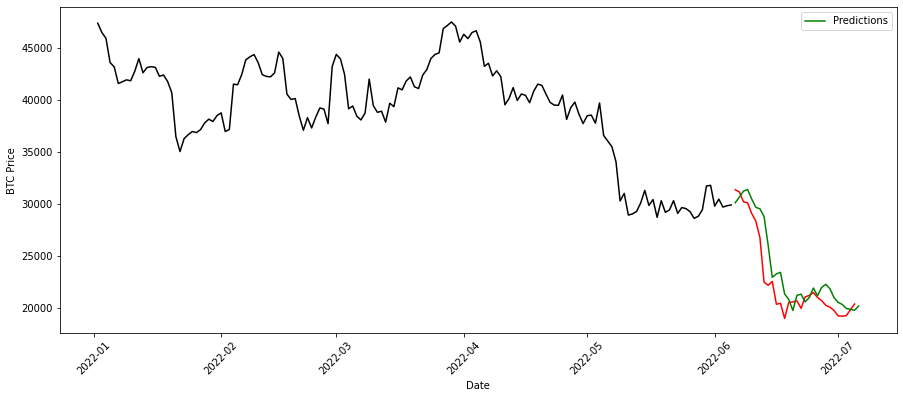

In [117]:
y_pred = result.get_forecast(len(test.index)
                             ,exog=test[['Open','High','Low','Volume']]
                            )
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = result.predict(start = y_pred_df.index[0]
                                          , end = y_pred_df.index[-1]
                                          , exog=test[['Open','High','Low','Volume']]
                                         )
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
#y_pred_out.plot(legend = True)
#test['Adj Close'].plot(legend = True)
plt.figure(figsize=(15,6))
plt.plot(train[train.index>'2022-01-01']['Adj Close'], color = "black")
plt.plot(test['Adj Close'], color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [112]:
#res
df3_BTC=pd.merge(y_pred_out, test, how='left', on='Date')
df3_BTC=df3_BTC[['Predictions','Adj Close']]
res_BTC=(df3_BTC.iloc[len(df3_BTC)-1]['Predictions']-df3_BTC.iloc[len(df3_BTC)-2]['Adj Close'])/df3_BTC.iloc[len(df3_BTC)-2]['Adj Close']
res_BTC1=(df3_BTC.iloc[len(df3_BTC)-1]['Predictions']-df3_BTC.iloc[len(df3_BTC)-2]['Predictions'])/df3_BTC.iloc[len(df3_BTC)-2]['Predictions']
print(df3_BTC)

             Predictions     Adj Close
Date                                  
2022-06-06  30124.709060  31370.671875
2022-06-07  30666.994927  31155.478516
2022-06-08  31237.043905  30214.355469
2022-06-09  31394.593950  30111.998047
2022-06-10  30477.801774  29083.804688
2022-06-11  29675.609870  28360.810547
2022-06-12  29537.697969  26762.648438
2022-06-13  28793.872079  22487.388672
2022-06-14  26040.438513  22206.792969
2022-06-15  22961.144105  22572.839844
2022-06-16  23296.742953  20381.650391
2022-06-17  23440.949020  20471.482422
2022-06-18  21370.177740  19017.642578
2022-06-19  20841.554084  20553.271484
2022-06-20  19784.086026  20599.537109
2022-06-21  21241.946426  20710.597656
2022-06-22  21344.315275  19987.029297
2022-06-23  20608.121729  21085.876953
2022-06-24  21032.955051  21231.656250
2022-06-25  21937.012881  21502.337891
2022-06-26  21196.739734  21027.294922
2022-06-27  21995.360805  20735.478516
2022-06-28  22292.899926  20280.634766
2022-06-29  21880.400198 

In [113]:
print('TESLA %Price : ',res_TSLA,'TESLA %Prediction : ',res_TSLA1)
print('BITCOIN %Price : ',res_BTC,'BITCOIN %Prediction : ',res_BTC1)

TESLA %Price :  -0.0499753703220668 TESLA %Prediction :  -0.05048047717696901
BITCOIN %Price :  -0.009309045444791898 BITCOIN %Prediction :  0.02058181527961804
